# Analisis Exploratorio de Datos

Mediante la exploración detallada de un extenso conjunto de datos proporcionado por el Observatorio de Movilidad y Seguridad Vial (OMSV), se busca identificar patrones, tendencias y factores clave que contribuyen a la ocurrencia de siniestros y a la gravedad de sus consecuencias. Este análisis preliminar no solo sienta las bases para el diseño del dashboard y la definición de KPIs, sino que también ofrece perspectivas críticas que respaldarán la formulación de políticas efectivas y medidas preventivas para reducir el número de víctimas fatales en siniestros viales en la ciudad.

## 0. Importamos librerias

In [54]:
import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## 1. Obtencion de datos

In [55]:
df_siniestros = pd.read_csv("Datasets/df_siniestros.csv")

## 2. Exploracion Inicial

### 2A. Examinamos las primeras filas del dataframe para entender la estructura

In [56]:
df_siniestros.head()

,Id,Nro Victimas,Fecha,Año,Mes,Dia,Hora,Franja Horaria,Lugar,Tipo Calle,...,Longitud,Latitud,Participantes,Victima,Acusado,DiaSemana,MomentoDia,Rol,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Viernes,Madrugada,CONDUCTOR,MASCULINO,19.0
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AUTOPISTA,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Sábado,Madrugada,CONDUCTOR,MASCULINO,70.0
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Domingo,Mañana,CONDUCTOR,MASCULINO,30.0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,Domingo,Madrugada,CONDUCTOR,MASCULINO,18.0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Jueves,Madrugada,CONDUCTOR,MASCULINO,29.0


In [57]:
df_siniestros.shape

(707, 24)

In [58]:
df_siniestros.columns

Index(['Id', 'Nro Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora',
       'Franja Horaria', 'Lugar', 'Tipo Calle', 'Calle', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'Longitud', 'Latitud',
       'Participantes', 'Victima', 'Acusado', 'DiaSemana', 'MomentoDia', 'Rol',
       'Sexo', 'Edad'],
      dtype='object')

### 2B. Verificar los tipos de datos de las variables

In [59]:
df_siniestros.dtypes

Id                        object
Nro Victimas               int64
Fecha                     object
Año                        int64
Mes                        int64
Dia                        int64
Hora                      object
Franja Horaria             int64
Lugar                     object
Tipo Calle                object
Calle                     object
Cruce                     object
Dirección Normalizada     object
Comuna                     int64
Longitud                 float64
Latitud                  float64
Participantes             object
Victima                   object
Acusado                   object
DiaSemana                 object
MomentoDia                object
Rol                       object
Sexo                      object
Edad                     float64
dtype: object

## 3. Identificamos valores nulos y faltantes

In [60]:
columnas_sd_dicc = {}  

for columna in df_siniestros.columns:
    cantidad = (df_siniestros[columna] == 'SD').sum()
    columnas_sd_dicc[columna] = cantidad

for columna, conteo in columnas_sd_dicc.items():
    print(f"Columna '{columna}': {conteo} veces que aparece 'SD'")

Columna 'Id': 0 veces que aparece 'SD'
Columna 'Nro Victimas': 0 veces que aparece 'SD'
Columna 'Fecha': 0 veces que aparece 'SD'
Columna 'Año': 0 veces que aparece 'SD'
Columna 'Mes': 0 veces que aparece 'SD'
Columna 'Dia': 0 veces que aparece 'SD'
Columna 'Hora': 0 veces que aparece 'SD'
Columna 'Franja Horaria': 0 veces que aparece 'SD'
Columna 'Lugar': 0 veces que aparece 'SD'
Columna 'Tipo Calle': 0 veces que aparece 'SD'
Columna 'Calle': 0 veces que aparece 'SD'
Columna 'Cruce': 0 veces que aparece 'SD'
Columna 'Dirección Normalizada': 0 veces que aparece 'SD'
Columna 'Comuna': 0 veces que aparece 'SD'
Columna 'Longitud': 0 veces que aparece 'SD'
Columna 'Latitud': 0 veces que aparece 'SD'
Columna 'Participantes': 0 veces que aparece 'SD'
Columna 'Victima': 8 veces que aparece 'SD'
Columna 'Acusado': 20 veces que aparece 'SD'
Columna 'DiaSemana': 0 veces que aparece 'SD'
Columna 'MomentoDia': 0 veces que aparece 'SD'
Columna 'Rol': 0 veces que aparece 'SD'
Columna 'Sexo': 2 veces

In [61]:
df_siniestros.isnull().sum()

Id                       0
Nro Victimas             0
Fecha                    0
Año                      0
Mes                      0
Dia                      0
Hora                     0
Franja Horaria           0
Lugar                    0
Tipo Calle               0
Calle                    0
Cruce                    0
Dirección Normalizada    0
Comuna                   0
Longitud                 0
Latitud                  0
Participantes            0
Victima                  0
Acusado                  0
DiaSemana                0
MomentoDia               0
Rol                      0
Sexo                     0
Edad                     2
dtype: int64

## 5. Estadisticas descriptivas basicas

### Variables cuantitativas

In [62]:
df_siniestros.describe()

,Nro Victimas,Año,Mes,Dia,Franja Horaria,Comuna,Longitud,Latitud,Edad
count,707.000000,707.00000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,705.000000
mean,1.059406,2018.18529,6.695898,15.916549,11.567185,7.431400,-58.441645,-34.619662,42.068085
std,0.253879,1.66990,3.579454,8.655516,6.678319,4.374699,0.046398,0.035352,19.269350
min,1.000000,2016.00000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.00000,4.000000,9.000000,6.000000,4.000000,-58.476776,-34.643980,28.000000
50%,1.000000,2018.00000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622882,36.000000
75%,1.000000,2019.00000,10.000000,23.000000,17.000000,11.000000,-58.401841,-34.596991,55.000000
max,3.000000,2021.00000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654,95.000000


## Conclusiones Preliminares:
* Datos Generales:<br>
El conjunto de datos cuenta con 707 registros y 25 columnas.<br>
Las columnas relevantes incluyen información sobre el accidente, las víctimas, la ubicación, y detalles temporales como la fecha y hora.<br>
* Nulos y Valores Específicos:<br>
Se observa que hay celdas con el valor 'SD' en las columnas 'Id', 'Victima', 'Acusado', 'Sexo' y 'Fecha_fallecimiento'.<br>
Algunas columnas, como 'Edad' y 'Fecha_fallecimiento', contienen valores nulos que pueden necesitar tratamiento.<br>
* Características Temporales:<br>
Los accidentes parecen estar distribuidos de manera uniforme a lo largo de los años, meses y días, con un promedio de 1.06 víctimas por accidente.<br>
* Ubicación y Franja Horaria:<br>
La mayoría de los accidentes ocurren en la franja horaria entre las 6:00 y las 23:00 horas. <br>
La comuna más afectada es la número 7.<br>
* Edad:<br>
La edad promedio de las víctimas es de aproximadamente 42 años.

## Visualizacion de datos

## 6. Analisis Univariable

Observaremos la distribucion de los datos a partir de distintos graficos

### Edad

In [63]:
df_siniestros["Edad"].describe()

count    705.000000
mean      42.068085
std       19.269350
min        1.000000
25%       28.000000
50%       36.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

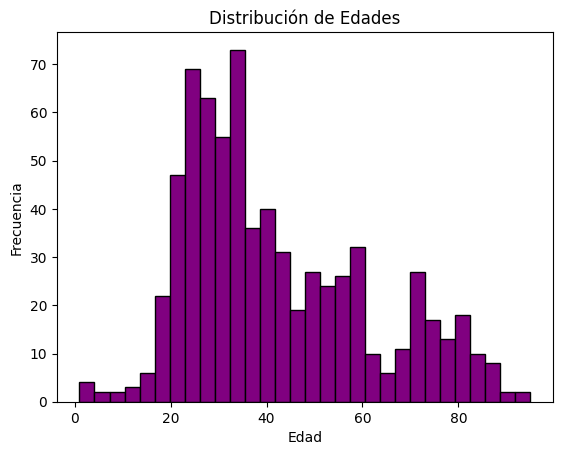

In [64]:
plt.hist(df_siniestros["Edad"].dropna(), bins=30, edgecolor='black', color="purple")
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

La estadística revela que la mayoría de las víctimas de incidentes viales tienen entre 20 y 40 años, con una concentración significativa en ese rango. Aunque el registro incluye edades desde 1 hasta 95 años, la distribución sesgada a la derecha muestra una disminución en la frecuencia a medida que la edad aumenta. Este análisis destaca la importancia de enfocar estrategias de seguridad vial y concientización especialmente en el grupo de edad más joven.

### Numero de victimas

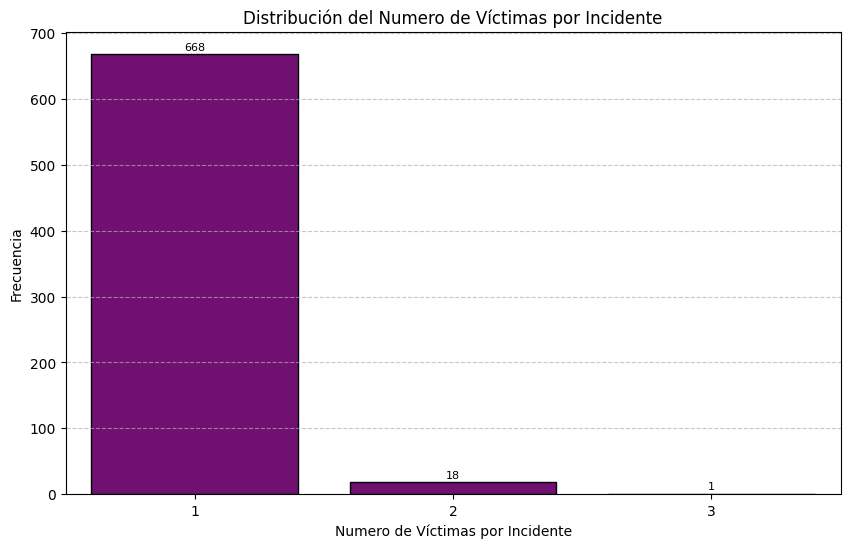

In [65]:
victimas_counts = df_siniestros.groupby("Id")["Nro Victimas"].max().value_counts().sort_index()

plt.figure(figsize=(10, 6))
a1= sns.barplot(x=victimas_counts.index, y=victimas_counts.values, color="purple", edgecolor="black")
plt.title("Distribución del Numero de Víctimas por Incidente")
plt.xlabel("Numero de Víctimas por Incidente")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in a1.patches:
    a1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


La representación gráfica indica que los incidentes viales con un reducido número de víctimas son considerablemente más frecuentes, con un total de 658 casos, en comparación con los incidentes que involucran un elevado número de víctimas.

### Mes


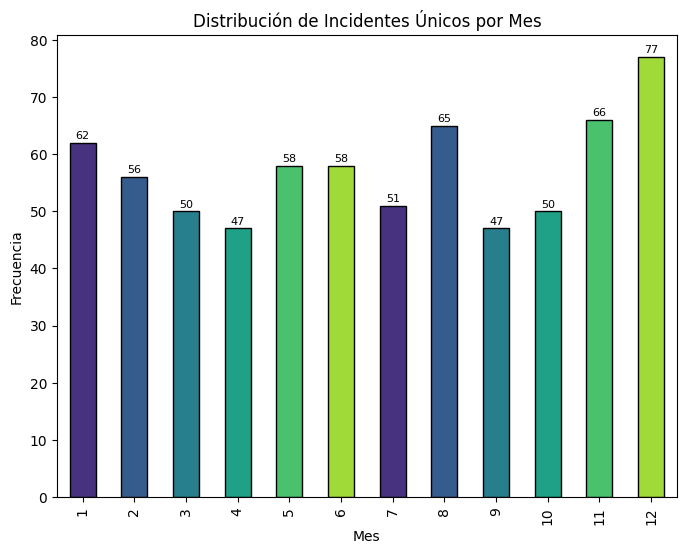

In [66]:
incidentes_por_mes = df_siniestros.groupby("Mes")["Id"].nunique()

plt.figure(figsize=(8, 6))
a2= incidentes_por_mes.plot(kind="bar", color=sns.color_palette("viridis"), edgecolor="black")
plt.title("Distribución de Incidentes Únicos por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
for p in a2.patches:
    a2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [67]:
total_incidentes_mes = np.sum(incidentes_por_mes)
porcentajes_mes = (incidentes_por_mes/ total_incidentes_mes) * 100

df_mes = pd.DataFrame({
    'MES': incidentes_por_mes.index,
    'Frecuencia': incidentes_por_mes.values,
    'Porcentaje': porcentajes_mes.values
})

df_mes

,MES,Frecuencia,Porcentaje
0,1,62,9.024745
1,2,56,8.151383
2,3,50,7.278020
3,4,47,6.841339
4,5,58,8.442504
5,6,58,8.442504
6,7,51,7.423581
7,8,65,9.461426
8,9,47,6.841339
9,10,50,7.278020


Se puede observar un patrón anual en la distribución de incidentes, destacando un pico significativo en diciembre, lo que indica que este mes experimentó la mayor cantidad de incidentes. Contrastando con esta tendencia, abril emerge como el mes con la menor cantidad de incidentes registrados. Este análisis revela una tendencia general de disminución gradual de incidentes desde enero hasta abril, seguida de un aumento progresivo en los meses de mayo, junio, agosto y noviembre.

### Años

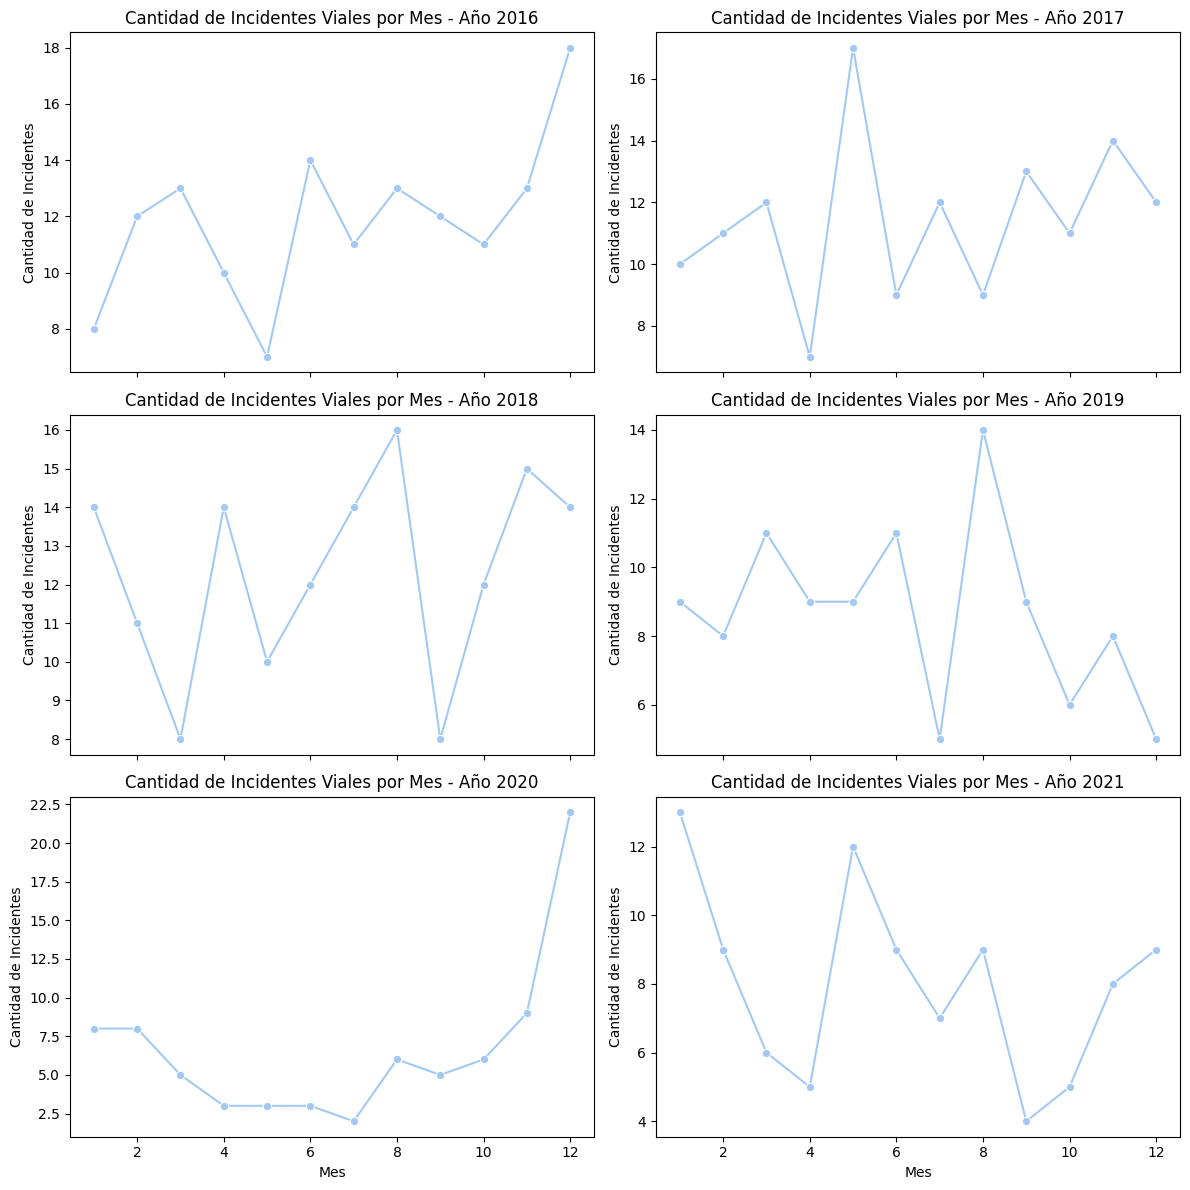

In [68]:
años = df_siniestros["Año"].unique()
n_filas = (len(años) + 1) // 2 

fig, axs = plt.subplots(nrows=n_filas, ncols=2, figsize=(12, 4 * n_filas), sharex=True)

for i, año in enumerate(años):
    fila = i // 2
    columna = i % 2
    incidentes_por_mes_año = df_siniestros[df_siniestros["Año"] == año].groupby("Mes").size().reset_index(name="Cantidad")
    
    sns.lineplot(x="Mes", y="Cantidad", data=incidentes_por_mes_año, marker='o', ax=axs[fila, columna])
    axs[fila, columna].set_title(f"Cantidad de Incidentes Viales por Mes - Año {año}")
    axs[fila, columna].set_xlabel("Mes")
    axs[fila, columna].set_ylabel("Cantidad de Incidentes")

if len(años) % 2 != 0:
    fig.delaxes(axs[n_filas - 1, 1])

plt.tight_layout()
plt.show()



Las visualizaciones previas no revelan un patrón consistente a lo largo del año al comparar entre diferentes años. Los picos de siniestros viales no coinciden en los mismos meses para los diversos años registrados. Sin embargo, se destaca de manera evidente la marcada disminución de accidentes fatales desde diciembre de 2019 hasta noviembre de 2020, una tendencia que se vincula con la pandemia de COVID-19.

### Tipo de calle

In [69]:
df_siniestros["Tipo Calle"].describe()

count         707
unique          3
top       AVENIDA
freq          442
Name: Tipo Calle, dtype: object

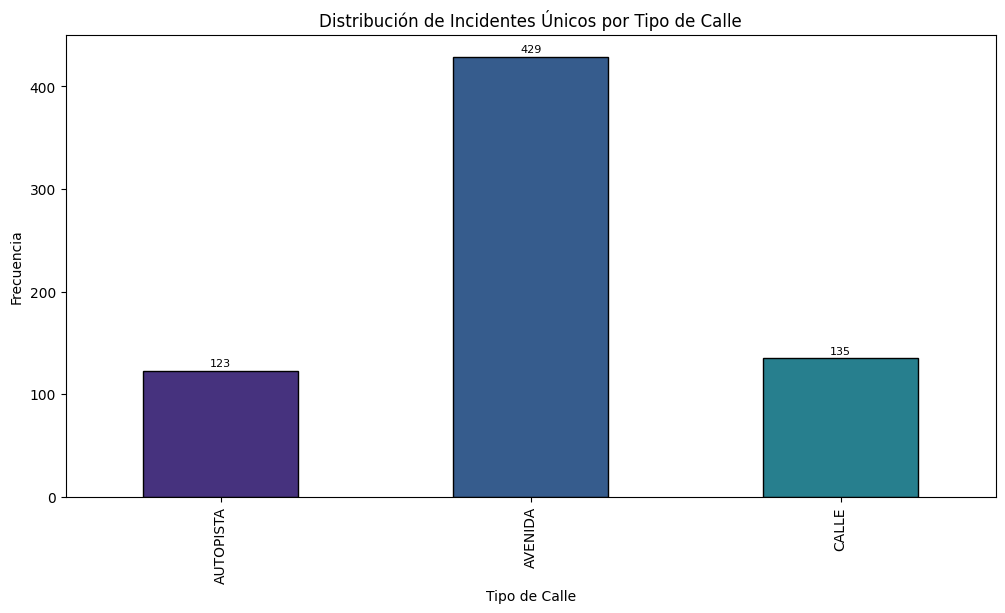

In [70]:
incidentes_por_tipo_calle = df_siniestros.groupby("Tipo Calle")["Id"].nunique()

plt.figure(figsize=(12, 6))
a3= incidentes_por_tipo_calle.plot(kind="bar", color=sns.color_palette("viridis"), edgecolor="black")
plt.title("Distribución de Incidentes Únicos por Tipo de Calle")
plt.xlabel("Tipo de Calle")
plt.ylabel("Frecuencia")
for p in a3.patches:
    a3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()



In [71]:
total_incidentes = np.sum(incidentes_por_tipo_calle)
porcentajes_tipo_calle = (incidentes_por_tipo_calle / total_incidentes) * 100

df_tipo_calle = pd.DataFrame({
    'Tipo Calle': incidentes_por_tipo_calle.index,
    'Frecuencia': incidentes_por_tipo_calle.values,
    'Porcentaje': porcentajes_tipo_calle.values
})

df_tipo_calle

,Tipo Calle,Frecuencia,Porcentaje
0,AUTOPISTA,123,17.903930
1,AVENIDA,429,62.445415
2,CALLE,135,19.650655


El análisis gráfico revela una mayor incidencia de incidentes viales en las avenidas (62.4%) en comparación con las calles y autopistas. Esta disparidad puede atribuirse a diversos factores, como el aumento del flujo vehicular en las avenidas, la velocidad más elevada de los vehículos en estas vías, así como la mayor presencia de peatones y ciclistas.

### Comuna

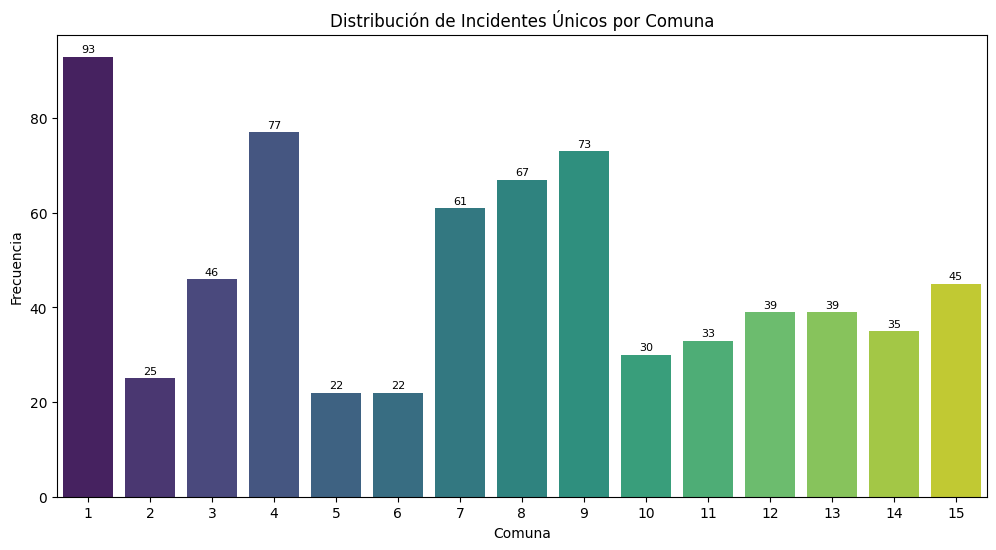

In [72]:
incidentes_por_comuna = df_siniestros.groupby("Comuna")["Id"].nunique()

plt.figure(figsize=(12, 6))
a4= sns.countplot(x="Comuna", data=df_siniestros, palette="viridis")
plt.title("Distribución de Incidentes Únicos por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Frecuencia")
for p in a4.patches:
    a4.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [73]:
total_incidentes_comuna = np.sum(incidentes_por_comuna)
porcentajes_comuna = (incidentes_por_comuna / total_incidentes_comuna) * 100

df_comuna = pd.DataFrame({
    'Comuna': incidentes_por_comuna.index,
    'Porcentaje': porcentajes_comuna.values
})

df_comuna

,Comuna,Porcentaje
0,1,13.100437
1,2,3.639010
2,3,6.550218
3,4,10.771470
4,5,3.202329
5,6,3.056769
6,7,8.588064
7,8,9.461426
8,9,10.480349
9,10,4.221252


En el grafico podemos observar que la comuna que tiene la mayor cantidad de incidentes viales es la comuna 1 que representa los barrios de:Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución. <br>
La segunda comuna con mas incidentes viales es la comuna 4 que representa los barrios de: La Boca, Barracas, Parque Patricios y Nueva Pompeya. <br>
Mientras que las dos comunas que representan el numero mas bajo de incidentes son comuna 5 que representa los barrios de Almagro y Boedo, y la comuna 6 que representa el barrio de Caballito. <br>
Esto puede deberse a varios factores, como la mayor cantidad de vehículos que circulan en estas comunas, la mayor densidad de población, y la mayor presencia de peatones y ciclistas.

### Participantes

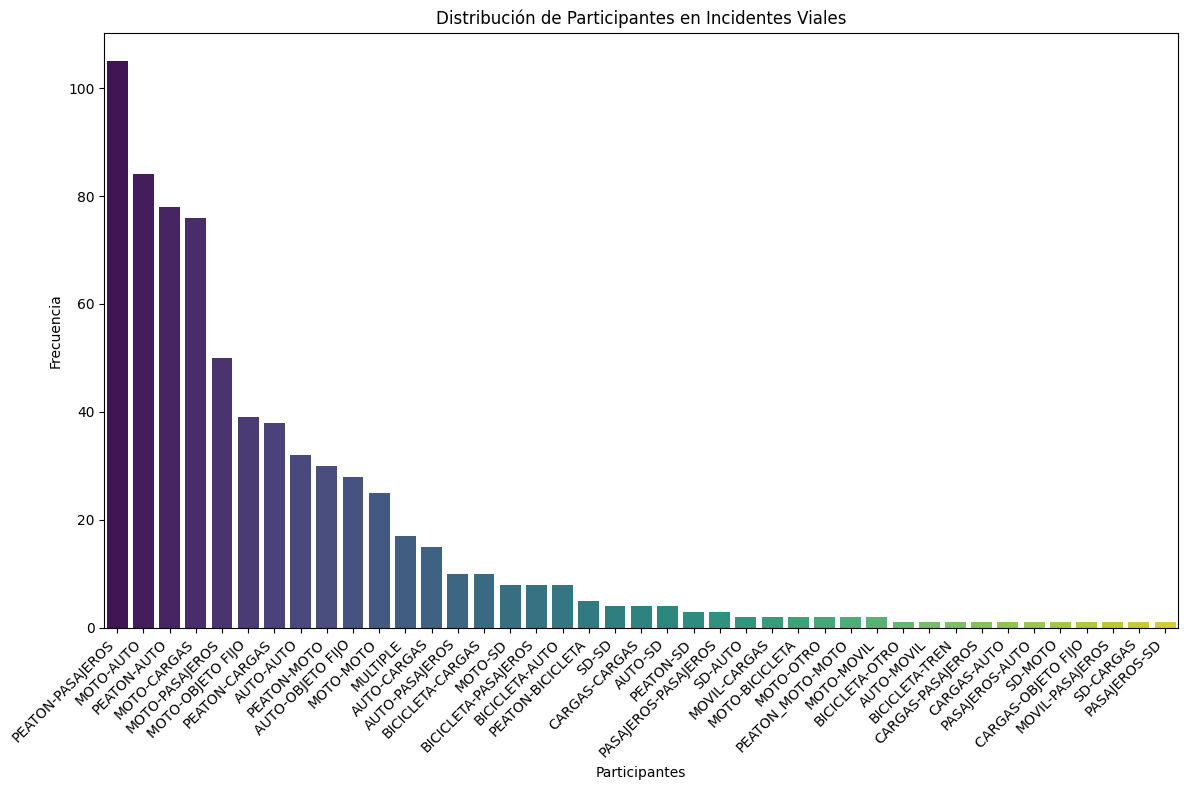

In [74]:
participantes_counts = df_siniestros["Participantes"].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(x=participantes_counts.index, y=participantes_counts.values, palette="viridis")

plt.title("Distribución de Participantes en Incidentes Viales")
plt.xlabel("Participantes")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [75]:
participantes_counts.head(5)

Participantes
PEATON-PASAJEROS    105
MOTO-AUTO            84
PEATON-AUTO          78
MOTO-CARGAS          76
MOTO-PASAJEROS       50
Name: count, dtype: int64

Resulta notable que la mayoría de las víctimas se vean involucradas en incidentes que incluyen a peatones y pasajeros. De acuerdo con la definición en el diccionario de datos, un peatón se refiere a cualquier víctima distinta de los ocupantes de un vehículo, ya sea conductor o pasajero, mientras que un pasajero se define como cualquier persona lesionada dentro, descendiendo o ascendiendo de unidades de transporte público y ómnibus de larga distancia. Además, al analizar los participantes en los incidentes viales, se destaca que la combinación más frecuente es la de "PEATON-PASAJEROS", seguida de cerca por "MOTO-AUTO" y "PEATON-AUTO". Es relevante señalar que la variable "participantes" indica la conexión entre víctimas y acusados en estos eventos.

### Victima

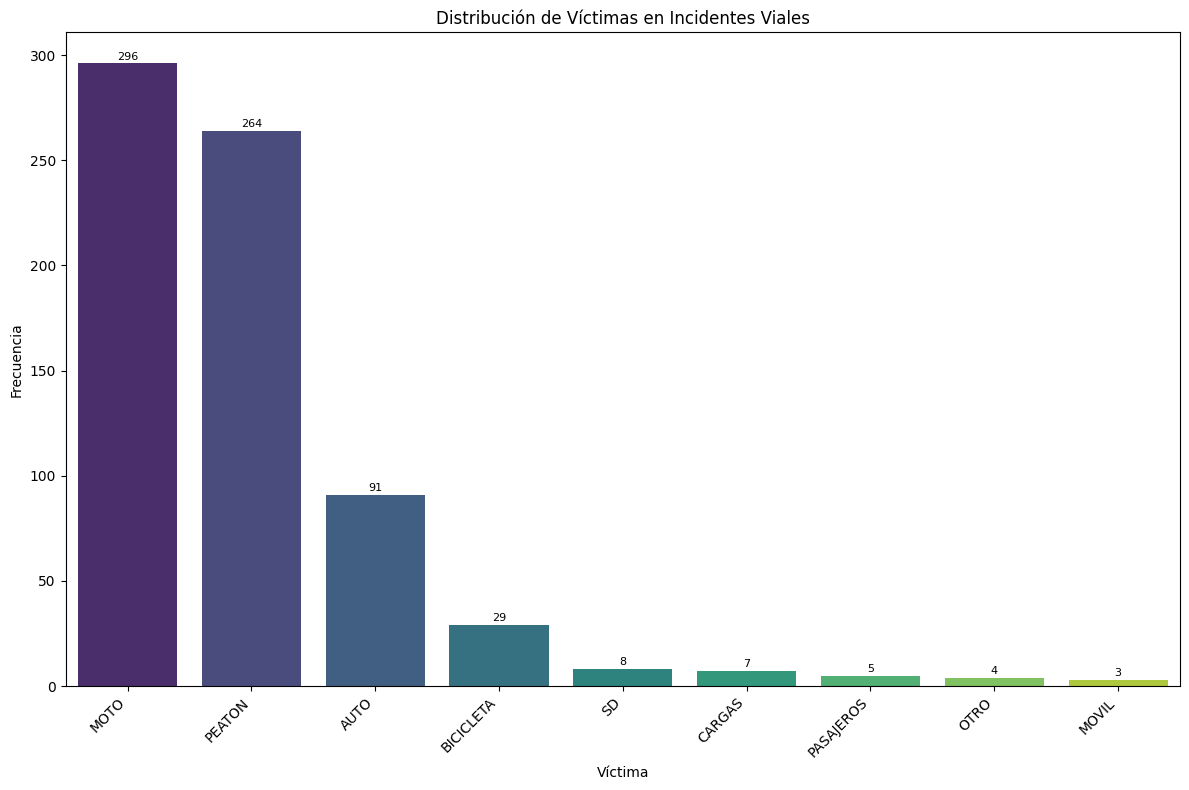

In [76]:
victima_counts = df_siniestros["Victima"].value_counts()
plt.figure(figsize=(12, 8))
a5= sns.barplot(x=victima_counts.index, y=victima_counts.values, palette="viridis")
plt.title("Distribución de Víctimas en Incidentes Viales")
plt.xlabel("Víctima")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
for p in a5.patches:
    a5.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


In [77]:
total_incidentes_victima= np.sum(victima_counts)
porcentajes_victimas = (victima_counts / total_incidentes_victima) * 100

df_victimas_= pd.DataFrame({
    'Victimas': victima_counts.index,
    'Porcentaje': porcentajes_victimas.values
})

df_victimas_

,Victimas,Porcentaje
0,MOTO,41.867044
1,PEATON,37.340877
2,AUTO,12.871287
3,BICICLETA,4.101839
4,SD,1.131542
5,CARGAS,0.990099
6,PASAJEROS,0.707214
7,OTRO,0.565771
8,MOVIL,0.424328


La categoría más frecuente en la variable "Victima" es "MOTO", lo que indica que las motocicletas son las más afectadas en los incidentes viales registrados en el conjunto de datos.La categoría "PEATON" también presenta una frecuencia significativa, destacando la vulnerabilidad de los peatones en los incidentes viales.

### Acusado

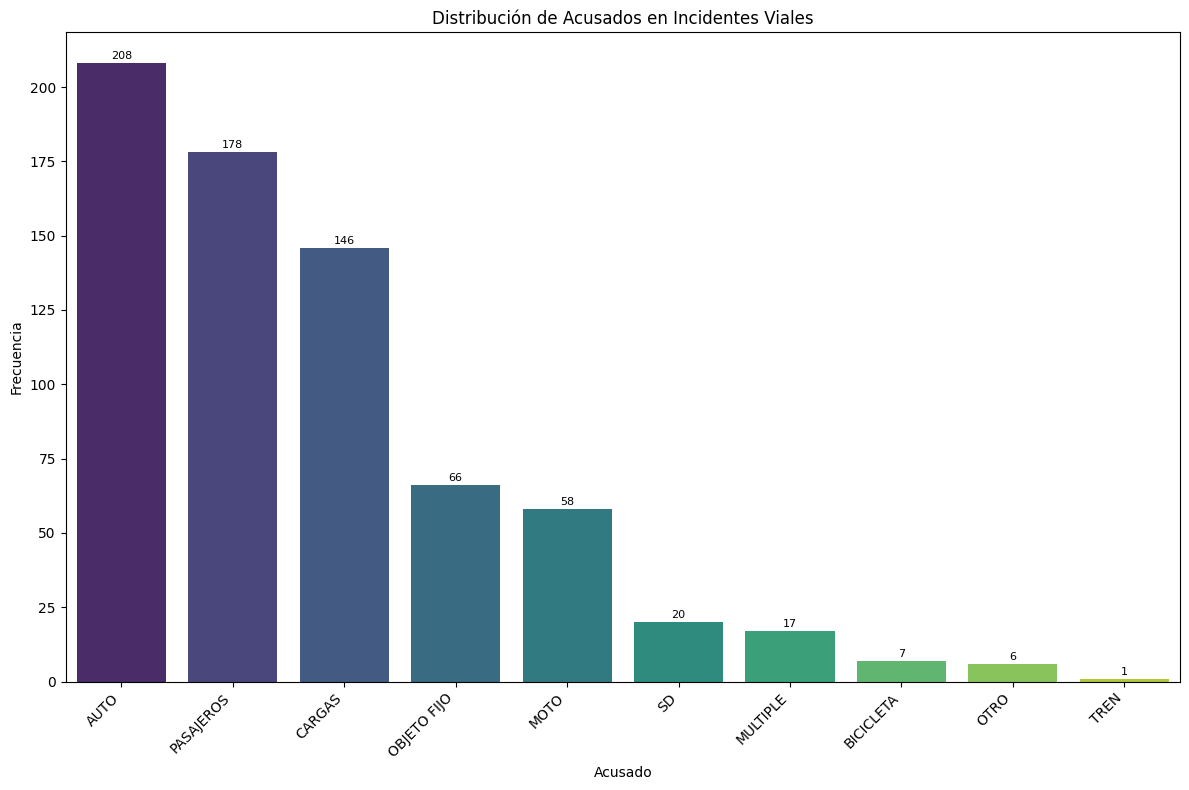

In [78]:
acusado_counts = df_siniestros["Acusado"].value_counts()
plt.figure(figsize=(12, 8))
a6 = sns.barplot(x=acusado_counts.index, y=acusado_counts.values, palette="viridis")
plt.title("Distribución de Acusados en Incidentes Viales")
plt.xlabel("Acusado")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
for p in a6.patches:
    a6.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [85]:
total_incidentes_acusado = np.sum(acusado_counts)
porcentajes_acusado = (acusado_counts / total_incidentes_acusado) * 100

df_acusado = pd.DataFrame({
    'Acusado': acusado_counts.index,
    'Porcentaje': porcentajes_acusado.values
})

df_acusado


,Acusado,Porcentaje
0,AUTO,29.420085
1,PASAJEROS,25.176803
2,CARGAS,20.650636
3,OBJETO FIJO,9.335219
4,MOTO,8.203678
5,SD,2.828854
6,MULTIPLE,2.404526
7,BICICLETA,0.990099
8,OTRO,0.848656
9,TREN,0.141443


El análisis del gráfico revela que los vehículos más frecuentemente implicados en incidentes viales son los automóviles, y de manera notable, los que transportan pasajeros, como el transporte público, tienden a ser acusados con mayor frecuencia en comparación con los vehículos de carga, como los camiones. Esta tendencia se refleja en la responsabilidad predominante de los conductores de automóviles en los eventos registrados, seguidos por pasajeros y vehículos de carga. La conexión entre estos hallazgos refuerza la importancia de la prudencia y la seguridad en la conducción, especialmente en situaciones que involucran transporte público y vehículos de pasajeros.


### Dia de la semana

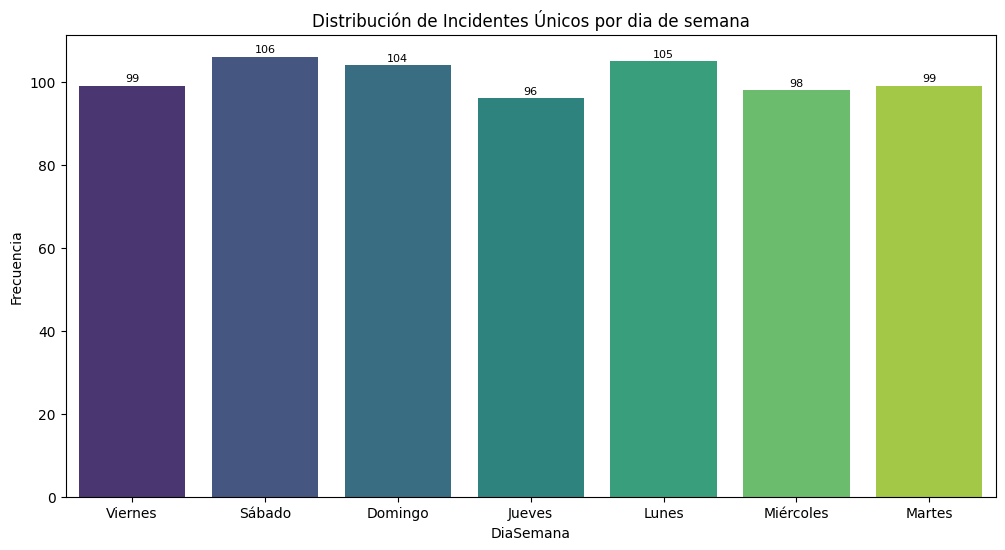

La diferencia porcentual entre el dia que menos incidentes tiene contra el dia de mayor incidentes es de: 10.638297872340425


In [80]:
incidentes_por_dia_semana = df_siniestros.groupby("DiaSemana")["Id"].nunique()

plt.figure(figsize=(12, 6))
a8= sns.countplot(x="DiaSemana", data=df_siniestros, palette="viridis")
plt.title("Distribución de Incidentes Únicos por dia de semana")
plt.xlabel("DiaSemana")
plt.ylabel("Frecuencia")
for p in a8.patches:
    a8.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

dia_menor_incidentes = incidentes_por_dia_semana.idxmin()
dia_mayor_incidentes = incidentes_por_dia_semana.idxmax()
diferencia_porcentual = ((incidentes_por_dia_semana.max() - incidentes_por_dia_semana.min()) / incidentes_por_dia_semana.min()) * 100
print(f"La diferencia porcentual entre el dia que menos incidentes tiene contra el dia de mayor incidentes es de: {diferencia_porcentual}")

El análisis del gráfico revela que el número de víctimas de incidentes viales es significativamente mayor durante los fines de semana en comparación con los días laborables. Dicha disparidad podría atribuirse a varios factores, entre ellos, un probable aumento en el consumo de alcohol y drogas, una mayor presencia de peatones y ciclistas en las calles, así como un incremento general en la cantidad de vehículos.

Al considerar la totalidad de los registros, se observa una distribución de accidentes que tiende a concentrarse principalmente entre los días viernes y lunes, alcanzando su punto máximo los sábados y su punto mínimo los jueves. Aunque existe una variación a lo largo de la semana, la diferencia porcentual entre la cantidad máxima y mínima registrada es moderada, situándose en un 10.6%. Este hallazgo sugiere una distribución relativamente uniforme de incidentes a lo largo de la semana, a pesar del claro aumento en los fines de semana.

### Momento del dia 

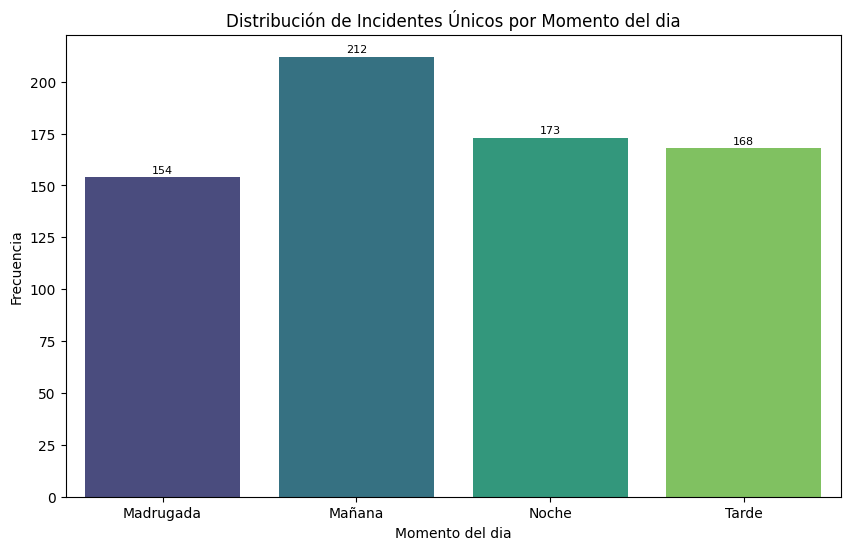

In [81]:
incidentes_por_dia_semana = df_siniestros.groupby("MomentoDia")["Id"].nunique()

plt.figure(figsize=(10, 6))
a9= sns.countplot(x="MomentoDia", data=df_siniestros, palette="viridis")
plt.title("Distribución de Incidentes Únicos por Momento del dia")
plt.xlabel("Momento del dia")
plt.ylabel("Frecuencia")
for p in a9.patches:
    a9.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


El análisis del gráfico revela patrones distintivos en la distribución de incidentes viales a lo largo del día. Se observa que el número de incidentes es significativamente mayor durante las horas de la mañana, comprendidas entre las 6 a.m. y las 12 p.m., así como durante las horas de la noche, desde las 6 p.m. hasta las 12 a.m. En contraste, las horas de la tarde y la madrugada. Esta variación podría atribuirse a diversos factores, tales como el aumento del tráfico vehicular en las horas matutinas y vespertinas, así como la mayor presencia de ciclistas y peatones. Estas horas suelen coincidir con los períodos de entrada y salida de lugares de trabajo, escuelas y otras actividades cotidianas, lo que intensifica la complejidad del tráfico y la interacción entre diferentes modos de transporte.

### Rol

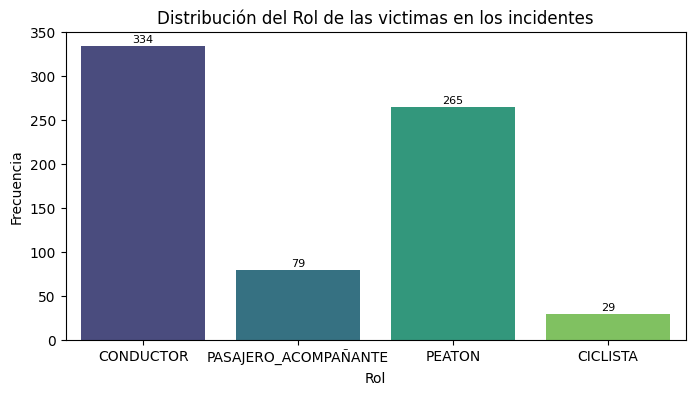

In [82]:
plt.figure(figsize=(8, 4))
a10 = sns.countplot(x="Rol", data=df_siniestros, palette="viridis")
plt.title("Distribución del Rol de las victimas en los incidentes")
plt.xlabel("Rol")
plt.ylabel("Frecuencia")
for p in a10.patches:
    a10.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [84]:
rol = df_siniestros["Rol"].value_counts()  
total_incidentes_rol = np.sum(rol)
porcentajes_rol = (rol / total_incidentes_rol) * 100

df_rol_ = pd.DataFrame({
    'Rol': rol.index,
    'Porcentaje': porcentajes_rol.values
})

df_rol_

,Rol,Porcentaje
0,CONDUCTOR,47.241867
1,PEATON,37.482320
2,PASAJERO_ACOMPAÑANTE,11.173975
3,CICLISTA,4.101839


El gráfico muestra que los conductores son las víctimas más comunes en los incidentes viales, seguidos de los peatones y los pasajeros. Esto puede deberse a que los conductores son los usuarios de la vía que están más expuestos a los riesgos de accidentes.

### Sexo

In [ ]:
victimas_genero = df_siniestros.groupby("Sexo")["Nro Victimas"].sum()
plt.figure(figsize=(8, 8))
plt.pie(victimas_genero, labels=victimas_genero.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title("Distribucion del Genero de las victimas")
plt.axis("equal")

plt.show()


In [ ]:
total_incidentes_genero= np.sum(victimas_genero)
porcentajes_genero = (victimas_genero / total_incidentes_genero) * 100

df_genero= pd.DataFrame({
    'Comuna': victimas_genero.index,
    'Porcentaje': porcentajes_genero.values
})

df_genero

Como habiamos visualizado previamente el genero mas frecuente en victimas de siniestros viales es el genero masculino con un porcentaje de 76.6% frente al genero femenino con un porcentaje de 23.1%

## 7. Analisis de Outliers

### Edad

In [ ]:
Q1 = df_siniestros["Edad"].quantile(0.25)
Q3 = df_siniestros["Edad"].quantile(0.75)
IQR = Q3 - Q1
limite_bajo = Q1 - 1.5 * IQR
limite_alto = Q3 + 1.5 * IQR
outliers_edad = df_siniestros[(df_siniestros["Edad"] < limite_bajo) | (df_siniestros["Edad"] > limite_alto)]

plt.figure(figsize=(8, 4))
sns.boxplot(x="Edad", data=df_siniestros, color="purple")
sns.scatterplot(x='Edad', y=None, data=outliers_edad, color="red", label="Outliers")
plt.title("Distribución de Edades con Outliers")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

print("Valores atípicos en la variable 'Edad':")
print(outliers_edad[['Id', 'Edad']])


La tabla de valores atípicos en la variable 'Edad' y el boxplot indican que no hay ningún valor atípico en la edad de las víctimas en los incidentes viales, según el método del rango intercuartílico (IQR). Esto significa que no hay observaciones que estén significativamente por encima o por debajo de los límites establecidos por el IQR.

### Numero de victimas

In [ ]:
max_victimas_por_incidente = df_siniestros.groupby("Id")["Nro Victimas"].max()
plt.figure(figsize=(8, 5))
sns.boxplot(x=max_victimas_por_incidente, color="purple")
plt.title("Boxplot del Numero de Víctimas por Incidente Vial")
plt.xlabel("Numero de Víctimas por Incidente")
plt.show()

In [ ]:
max_victimas_por_incidente = df_siniestros.groupby("Id")["Nro Victimas"].max()
Q1_b = max_victimas_por_incidente.quantile(0.25)
Q3_b = max_victimas_por_incidente.quantile(0.75)
IQR_b = Q3_b - Q1_b
limite_bajo_b = Q1_b - 1.5 * IQR_b
limite_alto_b = Q3_b + 1.5 * IQR_b
outliers_victimas_b = max_victimas_por_incidente[(max_victimas_por_incidente < limite_bajo_b) | (max_victimas_por_incidente > limite_alto_b)]
print("Valores atípicos en el número máximo de víctimas por incidente:")
print(outliers_victimas_b)


Basándonos en el análisis de outliers en el número máximo de víctimas por incidente, observamos que hay varios incidentes que presentan un número inusualmente alto de víctimas. Estos incidentes específicos tienen dos o tres víctimas, y se repiten a lo largo de los años. Algunos de los casos más destacados son:
Incidente con ID "2017-0035" que tiene 3 víctimas.
Varios incidentes con ID "2016-0041", "2016-0126", "2017-0026", entre otros, que tienen 2 víctimas.
Estos resultados sugieren que algunos incidentes específicos han tenido un impacto significativo en el número total de víctimas.

## 8. Analisis de correlacion

Realizaremos el analisis de correlacion con el objetivo de entender la relación estadística entre dos o más variables en un conjunto de datos.

In [ ]:
columnas_mapa_calor = ["Nro Victimas", "Año", "Mes", "Dia", "Franja Horaria", "Comuna", "Longitud", "Latitud", "Edad"]
df_mapa_calor = df_siniestros[columnas_mapa_calor]
matriz_correlacion = df_mapa_calor.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


## 9. Analisis Bivariable

### Relacion entre Comuna y Numero de victimas

In [ ]:
victimas_por_comuna = df_siniestros.groupby("Comuna")["Nro Victimas"].sum().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x="Comuna", y="Nro Victimas", data=victimas_por_comuna, palette='viridis')
plt.title("Comparación entre las Comunas y el Número Total de Víctimas")
plt.xlabel("Comuna")
plt.ylabel("Número Total de Víctimas")
plt.show()

Teniendo en cuenta que las comunas con mayor número de víctimas son las comunas 1, 4, 9 y 8, se puede concluir que estas comunas tienen un mayor riesgo de accidentes de tránsito que otras comunas de CABA.

Estas comunas tienen en común una serie de características que podrían contribuir a su mayor riesgo de accidentes de tránsito, incluyendo:

Una alta densidad de población y tránsito vehicular.
Una infraestructura vial deficiente.

Tambien es importante remarcar que las comunas que tienen mayor numero de victimas son las comunas que abarcan mas de un barrio y la mayoria son centricas como la comuna 1 que incluye Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución; mientras que las comunas que tienen menos densidad de victimas abarcan menos cantidad de barrios como la comuna 5 que incluye Almagro y Boedo.
![Comunas](Imagenes\1200px-Buenos_Aires_Comunas.svg.png)


### Relacion entre Tipo de Calle y Comuna

<Figure size 1200x800 with 0 Axes>

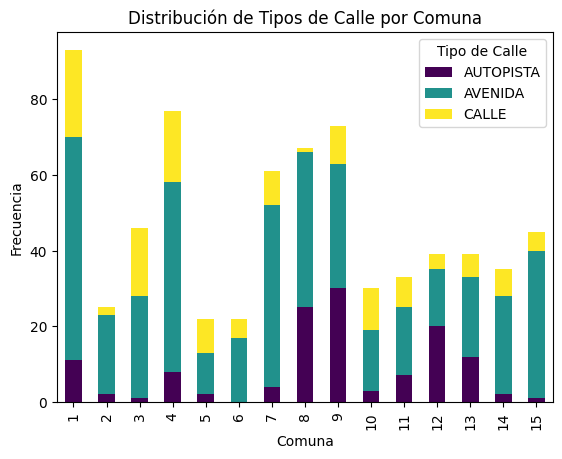

In [86]:
df_comuna_tipo_calle = df_siniestros.groupby(['Comuna', 'Tipo Calle']).size().unstack()

plt.figure(figsize=(12, 8))
df_comuna_tipo_calle.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de Tipos de Calle por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de Calle')
plt.show()


La alta frecuencia de accidentes en avenidas en la mayoría de las comunas de la Ciudad Autónoma de Buenos Aires indica posibles áreas críticas con alto flujo vehicular y, por ende, mayores riesgos de siniestros viales.  Esto subraya la necesidad de enfoques específicos de seguridad vial, como mejoras en la infraestructura, campañas de concientización y medidas de aplicación de la ley, para abordar eficazmente estos puntos de conflicto y reducir los accidentes en estas zonas.

### Relacion entre el Tipo de Calle y el Dia de la Semana

In [ ]:
victimas_por_tipo_calle_y_dia = df_siniestros.groupby(["Tipo Calle", "DiaSemana"])["Nro Victimas"].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x="Tipo Calle", y="Nro Victimas", hue="DiaSemana", data=victimas_por_tipo_calle_y_dia, palette="viridis")
plt.title("Relación entre Tipo de Calle, Día de la Semana y Número Total de Víctimas")
plt.xlabel("Tipo de Calle")
plt.ylabel("Número Total de Víctimas")
plt.legend(title="Día de la Semana")
plt.show()


El gráfico muestra que las avenidas tienen un mayor número de accidentes de tránsito que las calles y autopistas. Las avenidas muestran una mayor cantidad de accidentes los dias Viernes y la menor cantidad los dias domingos. En cuanto a las autopistas muestran una gran diferencia en la cantidad de accidentes los dias domingo como el dia de mayor cantidad y el de menor cantidad es el viernes, lo que demuestra la contraposicion entre autopista y avenida. Por ultimo las calles demuestran mayor cantidad de accidentes los dias martes y la menor cantidad los dias lunes.Este patrón puede indicar posibles condiciones del tráfico o comportamientos de conducción específicos asociados a ciertos días de la semana.

### Relacion entre el Momento del dia y la Edad

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='MomentoDia', y='Edad', data=df_siniestros, palette='Set2')
plt.title('Comparación de Edades por Momento del Día')
plt.xlabel('Momento del Día')
plt.ylabel('Edad')
plt.show()

A partir del grafico podemos observar que independiente de en que momento del dia sucede el accidente la edad de las victimas se encuentra dentro del rango de 20 a 40 años. En cuanto a lo que corresponde a la tarde presenta una mayor variabilidad en la edad a diferencia de los demas momentos del dia. La mañana presenta un pico en la edad cercano a los 100 años

### Relacion entre el dia de semana y el sexo de la victima

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="DiaSemana", hue="Sexo", data=df_siniestros, palette="viridis")
plt.title("Distribución de Género por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Frecuencia")
plt.legend(title="Género")
plt.show()

Como habiamos visualizado previamente el genero que representaba la mayor cantidad de victimas era el masculino por lo que resulta coherente el grafico. En cuanto a lo que corresponde a los dias de la semana el pico para el genero masculino se encuentra el dia lunes mientras que para el genero femenino se encuentra en el dia viernes como el dia miercoles

### Relacion entre Año y Sexo

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="Año", hue="Sexo", data=df_siniestros, palette="viridis")
plt.title("Distribución de Género por Año")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.legend(title="Género")
plt.show()

Al igual que el grafico anterior el genero que tiene mayor proporcion entre las victimas es el masculino. En el grafico se observa que el año con mayor cantidad de victimas es el año 2018 mientras que el de menor cantidad de victimas es el 2020. En cuanto al genero femenino el año 2018 fue en el que se registro la mayor cantidad de victimas de dicho genero mientras que para el genero masculina fue el año 2016.

### Relacion entre Rol y Edad

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Rol', y='Edad', data=df_siniestros, palette='viridis')
plt.title("Relación entre Rol y Edad en Incidentes Viales")
plt.xlabel("Rol")
plt.ylabel("Edad")
plt.show()

En términos de edades promedio, tanto los conductores de automóviles como los pasajeros acompañantes presentan edades similares, alrededor de los 35 años.Por otro lado, se destaca la presencia de edades mínimas alrededor de los 18 años en el rol de conductor, indicando la participación de conductores jóvenes. En contraste, en los roles de pasajero acompañante, peatón y otros, se observa una mayor variabilidad en las edades, desde niños pequeños hasta adultos mayores cercanos a los 90 años. A pesar de algunos valores atípicos en las edades de conductores y pasajeros acompañantes, estos casos parecen ser expectables y no indican anomalías significativas en el conjunto de datos.

### Relacion entre Victima y Acusado

In [ ]:
top_n_categories = 10
top_victima_categories = df_siniestros["Victima"].value_counts().head(top_n_categories).index
top_acusado_categories = df_siniestros["Acusado"].value_counts().head(top_n_categories).index
filtered_df = df_siniestros[df_siniestros["Victima"].isin(top_victima_categories) & df_siniestros["Acusado"].isin(top_acusado_categories)]
victima_acusado_counts = filtered_df[["Victima", "Acusado"]].apply(lambda x: x.value_counts()).T.fillna(0)
sns.set_palette("pastel", n_colors=top_n_categories)
plt.figure(figsize=(12, 8))
victima_acusado_counts.plot(kind='bar', width=0.8, edgecolor='black')
plt.title("Relación entre Víctima y Acusado en Incidentes Viales")
plt.xlabel("Rol")
plt.ylabel("Cantidad")
plt.legend(title="Rol",bbox_to_anchor=(1.2, 1), loc='upper right')
plt.tight_layout()  
plt.show()


En el gráfico, podemos observar las siguientes relaciones:

* La principal víctima de los incidentes viales son las motos; sin embargo, no se presentan con frecuencia como acusados. Por lo tanto, se concluye que rara vez son señaladas como los responsables del incidente.
* La segunda víctima de los incidentes viales son los peatones. En comparación con los acusados, se observa que muy pocas veces por no decir casi nunca son los causantes del incidente.
* En cuanto a los autos como víctimas, representan la mayor cantidad de acusados en comparación con las otras categorías.

### Relacion entre Rol y Genero

In [ ]:
df_rol_sexo = df_siniestros.groupby(['Rol', 'Sexo']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
df_rol_sexo.plot(kind='bar', stacked=True, color=['#31688e', '#440154'], edgecolor='black')
plt.title('Relación entre Rol y Sexo en Incidentes Viales')
plt.xlabel('Rol')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo', loc='upper right', labels=['Femenino', 'Masculino'])
plt.show()


Al saber que la mayor cantidad de victimas pertenecen al genero masculino podemos visualizar lo mismo a partir del grafico teniendo en cuenta que la mayor diferencia se encuentra en el rol de conductor


## Conclusiones e insights

1. **Edad y Víctimas:**
   - La mayoría de las víctimas de incidentes viales se concentran en el rango de edad de 20 a 40 años, sugiriendo la importancia de dirigir estrategias de seguridad vial y concientización especialmente hacia este grupo demográfico.

2. **Distribución de Víctimas:**
   - Incidentes con un número reducido de víctimas son mucho más comunes que aquellos con un elevado número de víctimas, resaltando la necesidad de medidas preventivas para evitar siniestros con consecuencias graves.

3. **Temporalidad de Incidentes:**
   - Se observa una tendencia anual en la distribución de incidentes, con un pico en diciembre y una disminución en abril. La variación mensual sugiere una posible influencia estacional en la frecuencia de incidentes.

4. **Ubicación y Tipo de Vehículo:**
   - Las avenidas, con mayor tráfico y velocidad, presentan una mayor incidencia de incidentes que las calles y autopistas. Las comunas con mayor densidad de población y tráfico vehicular también exhiben más incidentes, destacando la necesidad de mejoras en la infraestructura vial.

5. **Participantes en Incidentes:**
   - Los incidentes involucrando peatones y pasajeros son frecuentes, destacando la vulnerabilidad de estos grupos. La combinación "PEATON-PASAJEROS" es la más común, subrayando la importancia de medidas de seguridad para ambos.

6. **Tipo de Vehículo y Responsabilidad:**
   - Los automóviles, especialmente aquellos que transportan pasajeros, son los más comúnmente acusados en incidentes viales. Esta conexión refuerza la necesidad de precaución y seguridad por parte de los conductores, especialmente en el transporte público.

7. **Temporalidad Diaria de Incidentes:**
   - Los incidentes son más frecuentes durante las horas pico del tráfico, destacando la importancia de medidas preventivas y mayor conciencia durante estos períodos.

8. **Distribución Semanal y Mensual:**
   - La distribución uniforme de incidentes a lo largo de la semana sugiere que se deben implementar medidas de seguridad de manera constante. La disminución en abril y el aumento en diciembre pueden estar relacionados con factores estacionales y festivos.

9. **Género y Víctimas:**
   - Los hombres son las principales víctimas de incidentes viales, y este patrón se mantiene constante a lo largo de los días de la semana y los años analizados.

10. **Outliers y Casos Significativos:**
    - Algunos incidentes específicos presentan un número inusualmente alto de víctimas, destacando la necesidad de investigar y abordar casos específicos que contribuyen significativamente al total.

11. **Comunas con Mayor Riesgo:**
    - Las comunas 1, 4, 9 y 8 presentan el mayor número de víctimas, sugiriendo que estas áreas tienen un mayor riesgo de accidentes de tránsito. Factores como densidad de población y deficiencias en la infraestructura vial pueden contribuir a esta tendencia.

En conjunto, estos insights ofrecen una visión completa de los patrones y factores clave relacionados con los incidentes viales en el área analizada. Estos hallazgos pueden ser fundamentales para orientar políticas públicas, campañas de concientización y mejoras en la infraestructura vial con el objetivo de reducir la incidencia y gravedad de los incidentes viales.